#### Name: Prosperity Oguama  
#### ID Number: B01353634

## Part 1  
### Q1

#### A: Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and describe their relationship. You may use equations for clarification

Covariance is a measure of the movement of two variables with respect to one another. If two variables X and Y increase and decrease together, their covariance is positive, and if an increase in one variable leads to a decrease in the other, then their covariance is negative.  
The formula for covariance is given by:   

\begin{align}
        Cov (X, Y) = \frac{\sum_{i=1}^n(X_i -\bar{X}) \, (Y_j -\bar{Y})}{n}
    \end{align}

Where X and Y are the variables, $\bar{X}$ and $\bar{Y}$ are their respective means, and n is the number of data points.

Correlation, on the other hand, standardizes the covariance to produce a measure of how closely a change in one variable will affect another. While covariance measures only the direction of the relationship between two variables, correlation measures both the magnitude and the direction of movement. It ranges from -1 to +1. A positive correlation indicates that two variables change in the same direction, while a negative correlation indicates that an increase in one variable results in a decrease in the other variable.

The formula for correlation is given by:

\begin{align}
        r = \frac{1}{n} {\sum_{i=1}^n (\frac{X_i -\bar{X}}{S_x})\, (\frac{Y_j -\bar{Y}}{S_y}})  
\end{align}

Expanding Sx and Sy:

\begin{align}
        r = \frac{\sum(X_i - \bar{X}) \, (Y_i - \bar{Y})}{\sqrt{\sum(X_i - \bar{X})^2 \, \sum(Y_i - \bar{Y})^2}}
\end{align}

Where Where X and Y are the variables, $\bar{X}$ and $\bar{Y}$ are their respective means, n is the number of data points, and Sx and Sy are the standard deviations of X and Y respectively.


The relationship between covariance and correlation is that correlation standardizes variance by adjusting the scales of the variables to provide a dimensionless value that is easier to interpret. The correlation between two variables is calculated by dividing their covariance by the product of their standard deviations (square root of their variance). The relationship between covariance and correlation is expressed mathematically as:  


\begin{align}
        r = \frac{Cov(X, Y)}{\sigma_x . \sigma_y} = \frac{Cov(X, Y)}{\sqrt{Var(X) \, Var(Y)}}
\end{align}

#### B: Load the Iris dataset, using any method of your choice. Use visualization to explore the relationship between the different features.

In [68]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import itertools
from sklearn.datasets import load_iris

In [69]:
# Load the iris dataset features and target
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The data contains 150 rows

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no missing values in the dataset

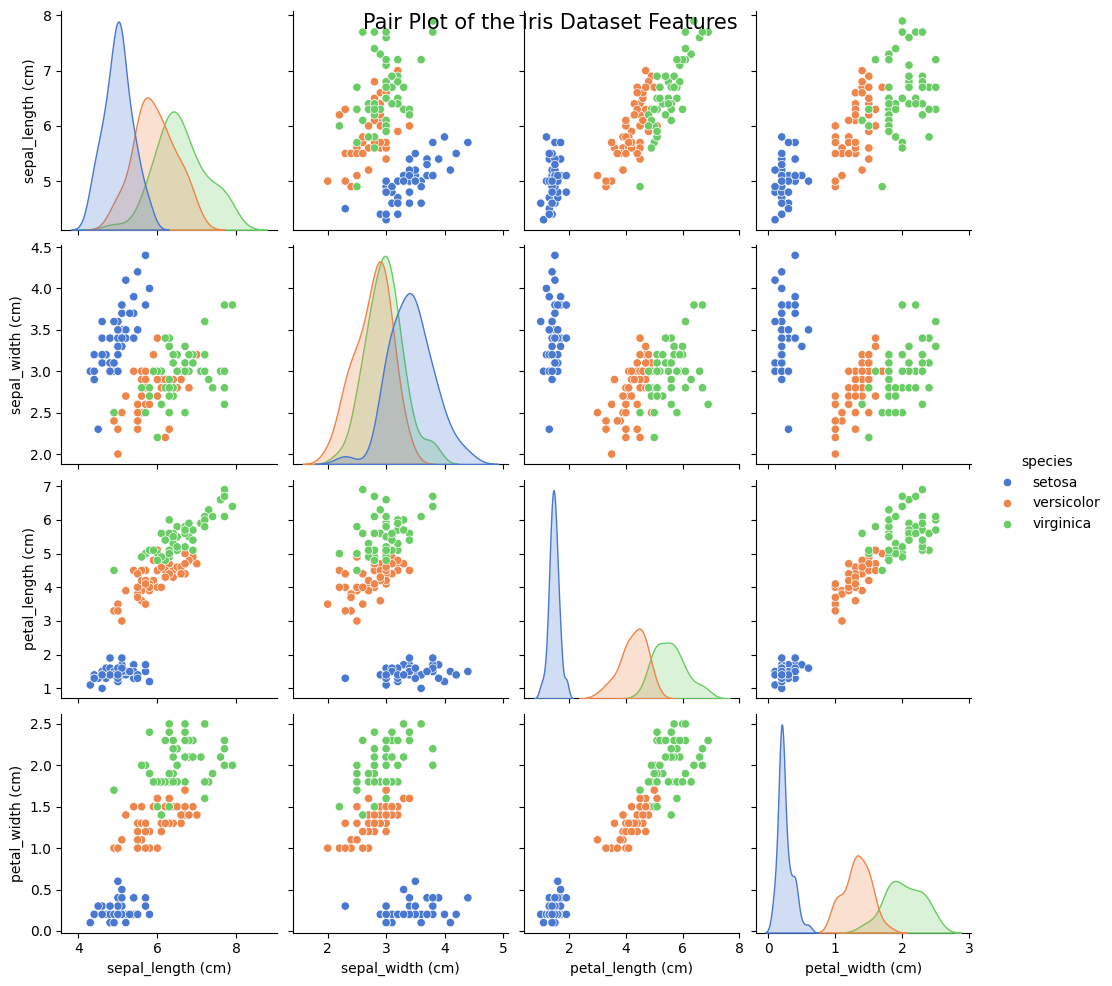

In [141]:
# Pair plot to observe the linear relationship between features and possible clusters
labels = ["sepal_length (cm)",	"sepal_width (cm)",	"petal_length (cm)",	"petal_width (cm)"]
pairplot = sns.pairplot(df, hue="species", diag_kind="kde", palette="muted")
pairplot.x_vars = labels
pairplot.y_vars = labels
pairplot._add_axis_labels()
plt.suptitle("Pair Plot of the Iris Dataset Features", fontsize=15)
plt.show()

In [73]:
# The numerical features are required for correlation and violin plots
# so we load an appropriate dataset for it
iris= load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df = iris_data.copy() # keep a copy without the target column for the correlation plot
iris_data["species"] = [i for i in iris.target] # add the target column for the violin plot
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


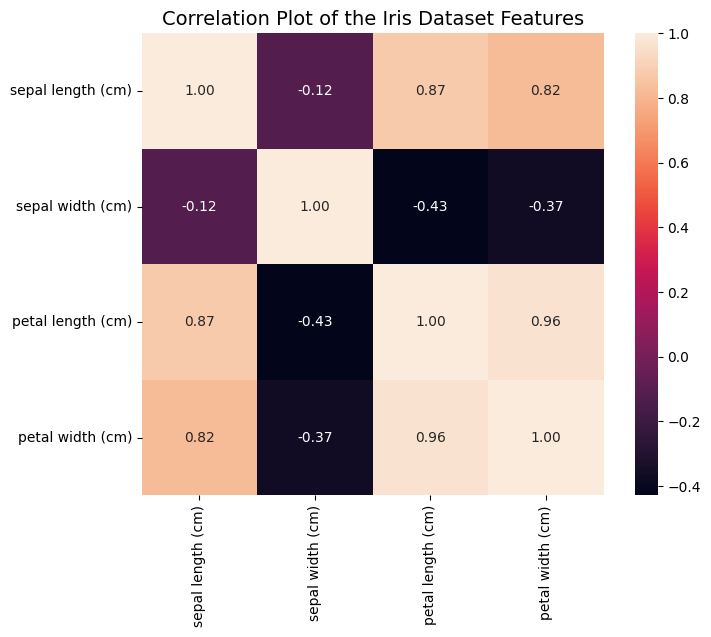

In [136]:
# Correlation plot of the iris dataset features
corr_iris = iris_df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_iris, square=True, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.title("Correlation Plot of the Iris Dataset Features", fontsize=14)
plt.show()

##### The pairplot and correlation plot show that:  
a) There are strong positive linear relationships between petal length and sepal length, petal width and sepal length, and petal length and petal width. Indicating that an increase in one variable usually corresponds to an increase in the other.
b) In addition, Petal length is the feature that distingushes the three iris classes most distinctly. For the other features, there are overlaps between the values for each class.

In [75]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


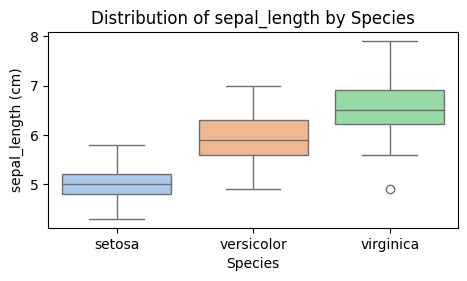

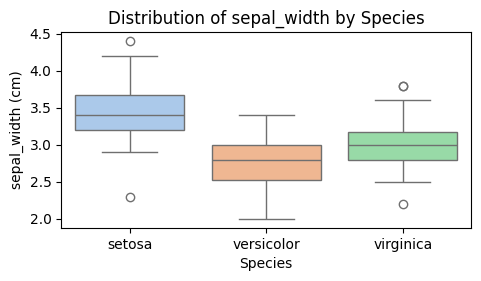

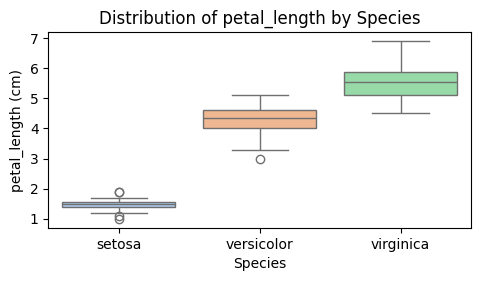

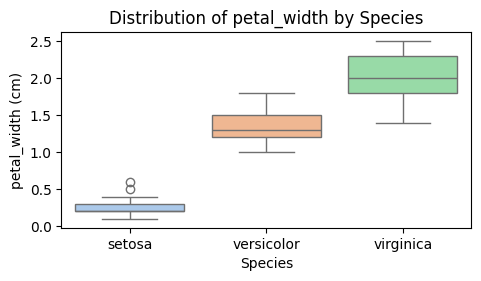

In [76]:
# Box plot for all the features grouped by species
cols = ["sepal_length", "sepal_width", "petal_length",
       "petal_width"]
for column in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="species", y=column, palette= "pastel",  hue= "species", legend= False)
    plt.title(f'Distribution of {column} by Species')
    plt.xlabel('Species')
    plt.ylabel(f"{column} (cm)")
    plt.tight_layout(pad=5.0)
    plt.show()

#### Based on the output of the box plots:  
a) The class virginica has the highest average (median) value for sepal length, petal length, and petal width. This means that it might represent the biggest specie.  
b) Setosa irises generally have longer sepal widths than those in the other classes.  
c) There are only a few outliers in each iris specie, indicating that the size rules apply in most cases.


In [77]:
# 3D scatter plot of sepal length, sepal width, and petal length to observe multivariate relationships
fig = px.scatter_3d(
    df,
    x="sepal_length",
    y="sepal_width",
    z="petal_length",
    color="species",
    title="3D Scatter Plot of Iris Dataset",
    labels={"species": "Species"},
    width=800,
    height=600
)

# Customize the plot
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(
    xaxis_title="Sepal Length (cm)",
    yaxis_title="Sepal Width (cm)",
    zaxis_title="Petal Length (cm)"
))
fig.show()

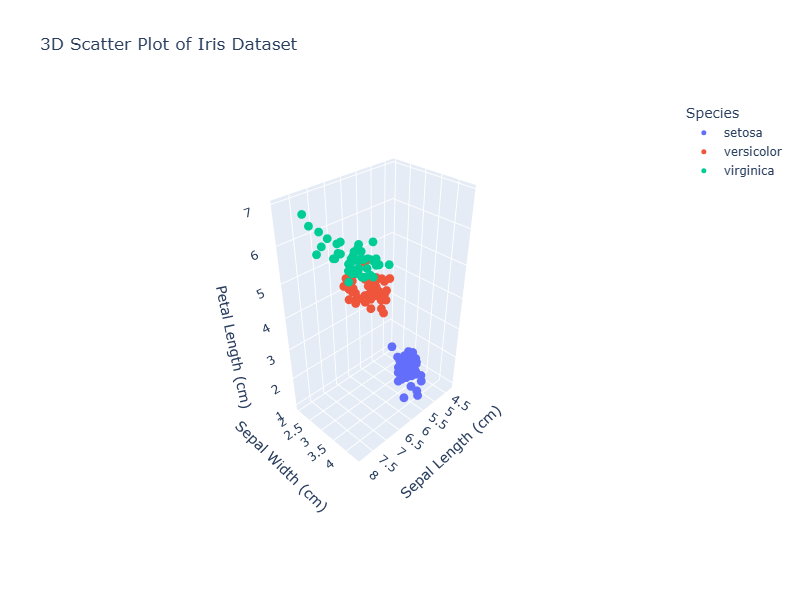

#### The 3D scatter plot shows a clear distinction between the three classes based on petal length, sepal width, and sepal length. This means that classical machine learning algorithms for classification problems can be used on this dataset

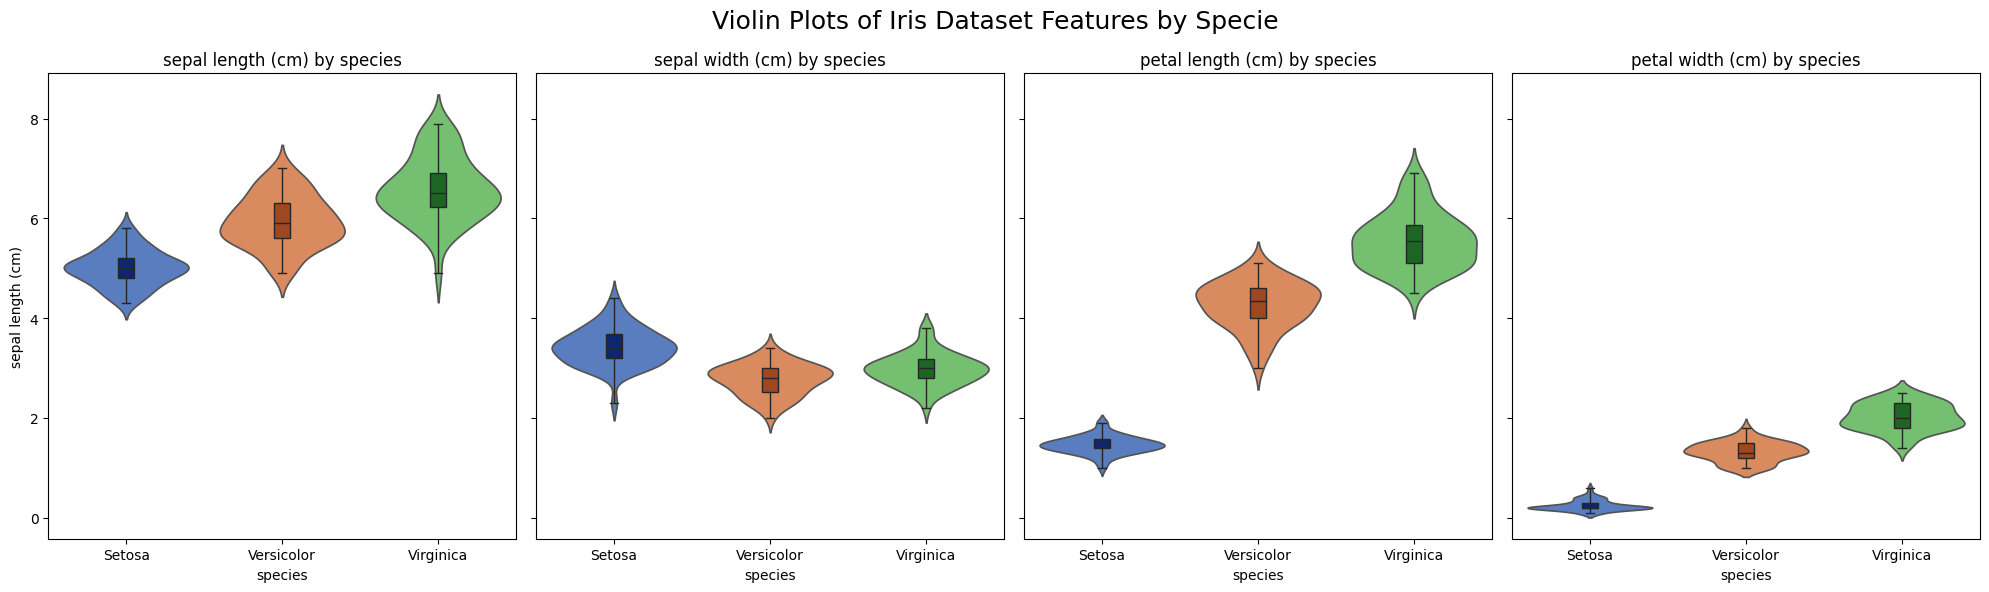

In [139]:
# Violin plot with box plots embedded to understand the distribution of each feature
def plot_violin_with_box(ax, data, feature, target_col):
    """
    Generate a violin plot with an embedded box plot for a given feature.

    Args:
    ax: Matplotlib Axes object where the plot will be drawn.
    data: Pandas DataFrame containing the data.
    feature: Feature (column) name to plot.
    target_col: Target column for grouping.
    """
    # Compute the median of the feature for each class in the target column
    class_medians = data.groupby(target_col)[feature].median()

    # Sort the classes by median values
    sorted_classes = class_medians.sort_values().index

    # Generate the violin plot with the sorted order
    sns.violinplot(
        ax=ax,
        data=data,
        x=target_col,
        y=feature,
        inner=None,  # Disable the inner representation for a cleaner box plot overlay
        palette="muted",
        hue= target_col,
        legend= False
    )
    sns.boxplot(
        ax=ax,
        data=data,
        x=target_col,
        y=feature,
        order=sorted_classes,
        width=0.1,  # Narrower box plot to embed into the violin plot
        showfliers=False,  # Hide outliers for clarity
        whis=[0, 100],  # Show entire data range
        palette="dark",
        hue= target_col,
        legend= False
    )
    ax.set_title(f'{feature} by {target_col}')

# Set up the subplots
fig, axes = plt.subplots(1, len(iris.feature_names), figsize=(20, 6), sharey=True)
fig.suptitle("Violin Plots of Iris Dataset Features by Specie", fontsize=18)
# Generate violin plots for each feature
for i, feature in enumerate(iris.feature_names):
    plot_violin_with_box(axes[i], iris_data, feature, "species")
    # Set xticklabels for the current subplot
    ticks = [0, 1, 2]
    labels = ["Setosa", "Versicolor", "Virginica"]
    axes[i].set_xticks(ticks)
    axes[i].set_xticklabels(labels)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### The widest parts of the violin plots indicate the values that occured most frequently in each class. So we can deduce that:  
a) Sepal length values are concentrated between 5.5cm to 6.3cm.
b) Sepal width values are mostly between 3.5cm and 3.7cm, with little variation between the three classes.
3) There is a wide variation between petal length colours for the three classes, with values ranging mostly between 1.5 and 5.5, depending on the class.  
4) Petal width calues range mostly between 0.2cm and 2cm.

#### C: Implement the following functions: a. A function to calculate the covariance between two variables: def calcCov(x, y): <your implementation here>, b. A function to compute the Covariance matrix: def covMat(data): <your implementation here> covMat(data) should return an n by n covariance matrix, where n is the number of features (in case of the iris dataset n=4)

$\qquad$ a) Covariance calculation function:

In [79]:
def calcCov(x, y):
  """
  Calculate the covariance between two variables.

  Params:
  x: first variable
  y: second variable

  Returns:
  Covariance value.
  """
  # Check that both variables have the same length
  if len(x) != len(y):
        raise ValueError("x and y must have the same length.")
  x = np.array(x)
  y = np.array(y)
  n = len(x)
  m = x.sum() / n
  m2 = y.sum() / n
  return sum([(xi - m) * (yi - m2) for xi, yi in zip(x, y)]) / n

$\qquad$ b) Covariance matrix function

In [80]:
def covMat(data):
  """
  Calculate covariance matrix

  Param:
  data: Pandas dataframe

  Returns:
  Covariance matrix
  """
  number_cols = len(data.columns)
  # initialize an array for storing the output
  cov_matrix = np.zeros((number_cols, number_cols))
  # calculate covariance using the calcCov function
  for i in range(number_cols):
    feature1 = data.columns[i]
    for j in range(number_cols):
      feature2 = data.columns[j]
      covariance = calcCov(data[feature1], data[feature2])
      cov_matrix[i, j] = covariance
  return cov_matrix

#### D: (Test1) compare the results of your function with NumPy's np.cov(data,rowvar=False) using the iris dataset.

In [81]:
# Function to calculate covariance with numpy
def numpy_cov(x, y):
  """
  Calculate the covariance between two variables using numpy.

  Params:
  x: first variable
  y: second variable

  Returns:
  Covariance value.
  """
  return np.cov(x, y, rowvar=False, ddof=0)[0,1]

In [82]:
# Function to calculate a covariance matrix with numpy
def numpy_cov_matrix(data):
  """
  Calculate covariance matrix using numpy.

  Param:
  data: Pandas dataframe

  Returns:
  Covariance matrix
  """
  return np.cov(data, rowvar=False, ddof=0)

In [83]:
# Covariance cannot be calculated on non-numeric coluimns, so we remove them
df_numeric = df.drop("species", axis=1)
df_numeric.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [84]:
# Iterate through column pairs and apply the calcCov and numpy conv() functions
calcCov_results = {}
numCov_results = {}
for (col1, col2) in itertools.combinations(iris_data.columns, 2):
  cov = calcCov(iris_data[col1], iris_data[col2])
  calcCov_results[(col1, col2)] = cov
  numConv = numpy_cov(iris_data[col1], iris_data[col2])
  numCov_results[(col1, col2)] = numConv
# Print the results
print("Covariance using the calcConv function:")
for pair, cov_value in calcCov_results.items():
    print(f"{pair}: {cov_value:.4f}")

print("\nCovariance using the numpy conv() function:")
for pair2, cov_value2 in numCov_results.items():
    print(f"{pair2}: {cov_value2:.4f}")

Covariance using the calcConv function:
('sepal length (cm)', 'sepal width (cm)'): -0.0422
('sepal length (cm)', 'petal length (cm)'): 1.2658
('sepal length (cm)', 'petal width (cm)'): 0.5128
('sepal length (cm)', 'species'): 0.5273
('sepal width (cm)', 'petal length (cm)'): -0.3275
('sepal width (cm)', 'petal width (cm)'): -0.1208
('sepal width (cm)', 'species'): -0.1513
('petal length (cm)', 'petal width (cm)'): 1.2870
('petal length (cm)', 'species'): 1.3633
('petal width (cm)', 'species'): 0.5933

Covariance using the numpy conv() function:
('sepal length (cm)', 'sepal width (cm)'): -0.0422
('sepal length (cm)', 'petal length (cm)'): 1.2658
('sepal length (cm)', 'petal width (cm)'): 0.5128
('sepal length (cm)', 'species'): 0.5273
('sepal width (cm)', 'petal length (cm)'): -0.3275
('sepal width (cm)', 'petal width (cm)'): -0.1208
('sepal width (cm)', 'species'): -0.1513
('petal length (cm)', 'petal width (cm)'): 1.2870
('petal length (cm)', 'species'): 1.3633
('petal width (cm)', 's

##### The covariance between feature pairs in the Iris dataset is equal using my calCov() function and Numpy's cov() function

In [85]:
# Print covariance matrix results with covMat() function and Numpy's cov() function
print("Covariance matrix using the CovMat function: ")
my_matrix_cov = covMat(df_numeric)
print(my_matrix_cov)

print("\n\n Covariance matrix using numpy's cov() function: ")
numpy_matrix_cov = numpy_cov_matrix(df_numeric)
print(numpy_matrix_cov)


Covariance matrix using the CovMat function: 
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


 Covariance matrix using numpy's cov() function: 
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


##### The covariance matrix generated by my covMat() function for the Iris dataset is equal to the covariance matrix generated by Numpy's cov() function

#### E: Using your covariance function, implement a function to calculate the correlation matrix:  
def corrMat(data):  
<should use covMat(data) and return the correlation matrix>

In [86]:
def corrMat(data):
  """
  Calculate correlation matrix

  Param:
  data: Pandas dataframe

  Returns:
  Correlation matrix
  """
  num_columns = len(data.columns)
  # initialize an array for the matrix
  corr_matrix = np.zeros((num_columns, num_columns))
  # compute the covariance matrix
  covariance_matrix = covMat(data)
  # compute the standard deviation of each variable
  std_dev = np.std(data, axis=0)
  # compute the correlation: covariance/ standard deviation
  for i in range(num_columns):
    for j in range(num_columns):
      corr_matrix[i, j] = covariance_matrix[i, j] / (std_dev.iloc[i] * std_dev.iloc[j])
  return corr_matrix

#### F: (Test2) validate your correlation matrix implementation by comparing it with the results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

In [87]:
# Function to calculate a correlation matrix with numpy
def numpy_corr_matrix(data):
  """
  Calculate correlation matrix using numpy.

  Param:
  data: Pandas dataframe

  Returns:
  Correlation matrix
  """
  return np.corrcoef(data, rowvar=False)

In [88]:
# Print correlation matrix results with corrMat() function and Numpy's corrcoef() function
print("Correlation using the corrMat function: ")
my_matrix_corr = corrMat(df_numeric)
print(my_matrix_corr)

print("\n\n Correlation using numpy's np.corrcoef() function: ")
numpy_matrix_corr = numpy_corr_matrix(df_numeric)
print(numpy_matrix_corr)

Correlation using the corrMat function: 
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


 Correlation using numpy's np.corrcoef() function: 
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


##### The correlation matrix generated by my corrMat() function for the Iris dataset is equal to the output from Numpy's corrcoef() function

#### G: Use visualizations to communicate the tests results. Include appropriate titles, axis labels, and colorbars where relevant.

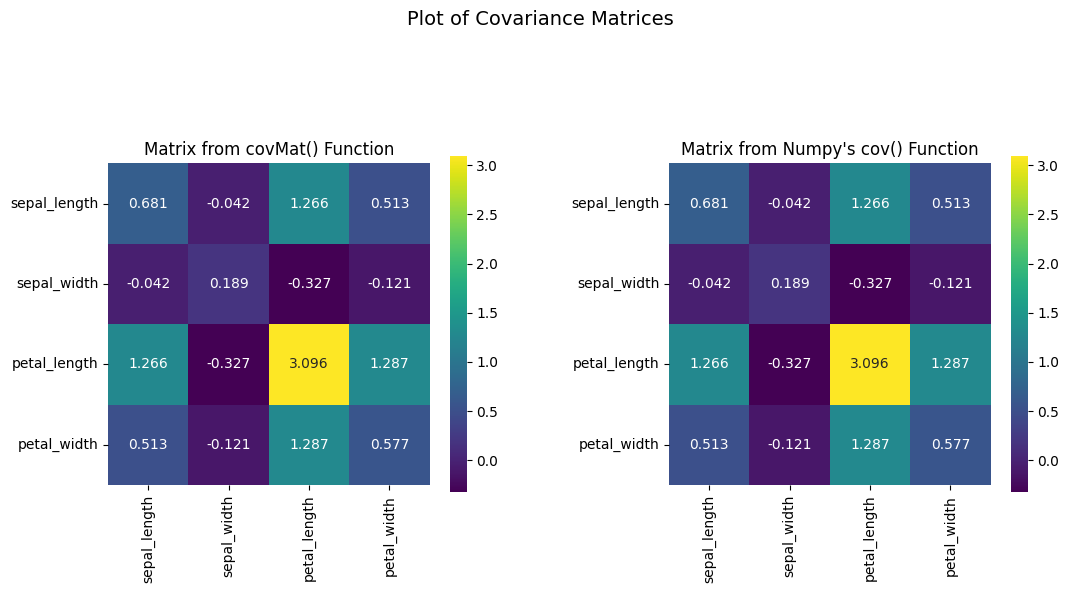

In [112]:
# Plotting both covariance matrices for comparison
num_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# plot the covariance matrix that we got versus numpy's matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Plot of Covariance Matrices", fontsize=14)
sns.heatmap(my_matrix_cov, cmap = 'viridis', fmt=".3f", square=True,
    annot=True, xticklabels= num_features, ax=ax[0], yticklabels= num_features,)
ax[0].set_title("Matrix from covMat() Function")

sns.heatmap(numpy_matrix_cov, cmap = 'viridis', fmt=".3f", square=True,
    annot=True, xticklabels= num_features, ax=ax[1], yticklabels= num_features,)
ax[1].set_title("Matrix from Numpy's cov() Function")
fig.tight_layout(pad=5.0)
plt.show()

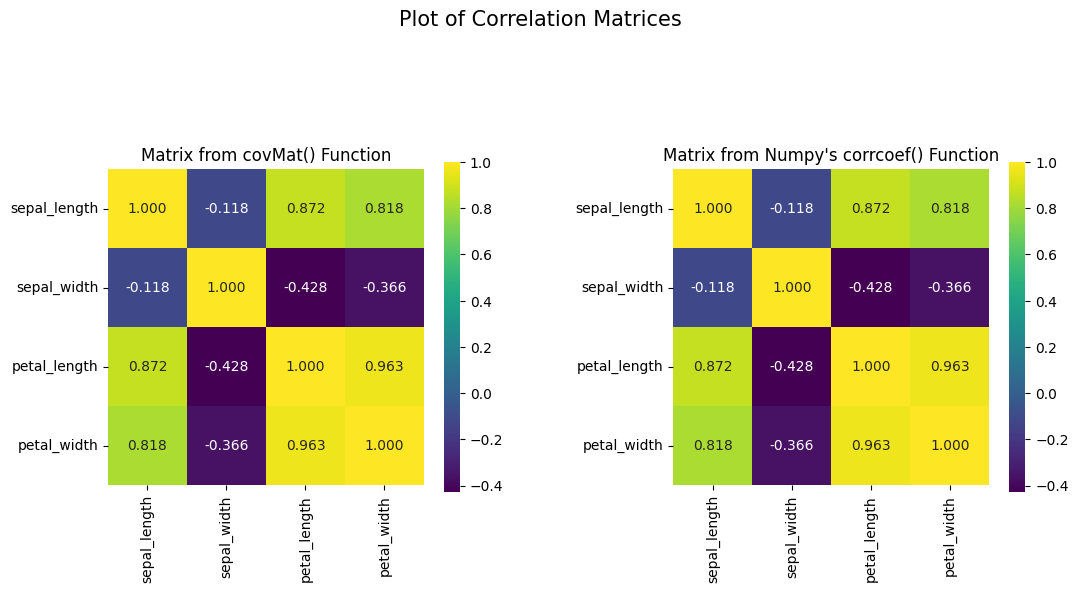

In [113]:
# Plotting both correlation matrices for comparison
num_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# plot the correlation matrix that we got versus numpy's matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Plot of Correlation Matrices", fontsize=15)
sns.heatmap(my_matrix_corr, cmap = 'viridis', fmt=".3f", square=True,
    annot=True, xticklabels= num_features, ax=ax[0], yticklabels= num_features,)
ax[0].set_title("Matrix from covMat() Function")

sns.heatmap(numpy_matrix_corr, cmap = 'viridis', fmt=".3f", square=True,
    annot=True, xticklabels= num_features, ax=ax[1], yticklabels= num_features,)
ax[1].set_title("Matrix from Numpy's corrcoef() Function")
fig.tight_layout(pad=5.0)
plt.show()

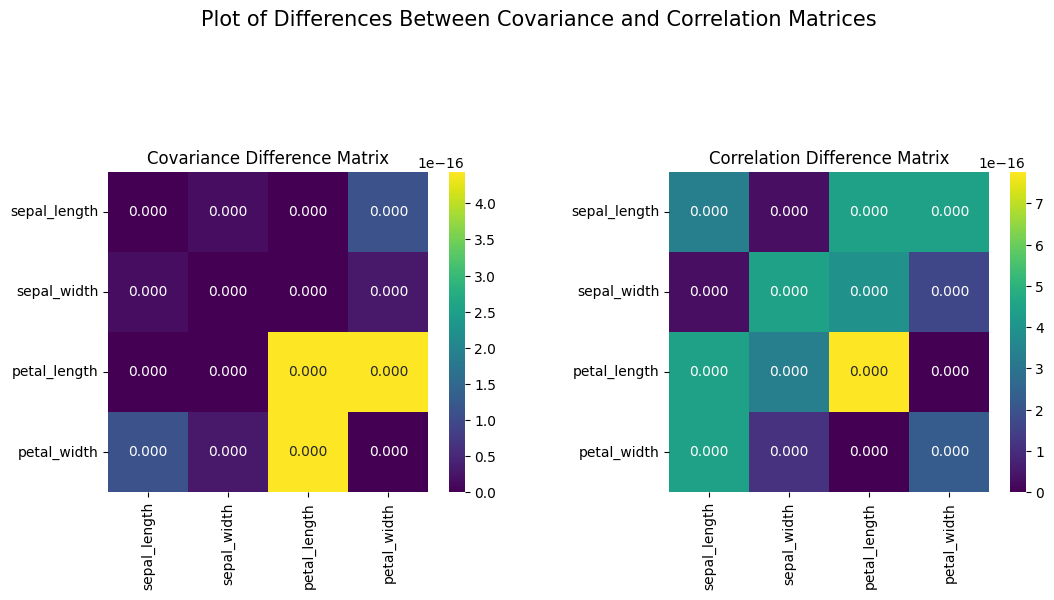

In [143]:
# Plotting the difference between the two matrices for further comparison
diff_matrix_cov = np.absolute(my_matrix_cov - numpy_matrix_cov)
diff_matrix_corr = np.absolute(my_matrix_corr - numpy_matrix_corr)

num_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# plot the difference in covariance and difference in correlation matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Plot of Differences Between Covariance and Correlation Matrices", fontsize=15)
sns.heatmap(diff_matrix_cov, cmap = 'viridis', fmt=".3f", square=True,
    annot=True, xticklabels= num_features, ax=ax[0], yticklabels= num_features,)
ax[0].set_title("Covariance Difference Matrix")

sns.heatmap(diff_matrix_corr, cmap = 'viridis', fmt=".3f", square=True,
    annot=True, xticklabels= num_features, ax=ax[1], yticklabels= num_features,)
ax[1].set_title("Correlation Difference Matrix")
fig.tight_layout(pad=5.0)
plt.show()

##### These matrices show the difference in values between my covariance matrix function and Numpy's covariance matrix function (on the left) and between my correlation matrix function and Numpy's correlation matrix function (on the right). All the matrix values are zero, indicating a perfect match between the output of my functions and Numpy's functions

### Q2  

#### A: Plot the price of all the laptops from the laptop_price dataset

In [92]:
# Loading the laptop prices data set
laptop_df = pd.read_csv("/content/laptop_price - dataset.csv")
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [93]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

##### The dataset has 1275 rows and no missing values

In [94]:
laptop_df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


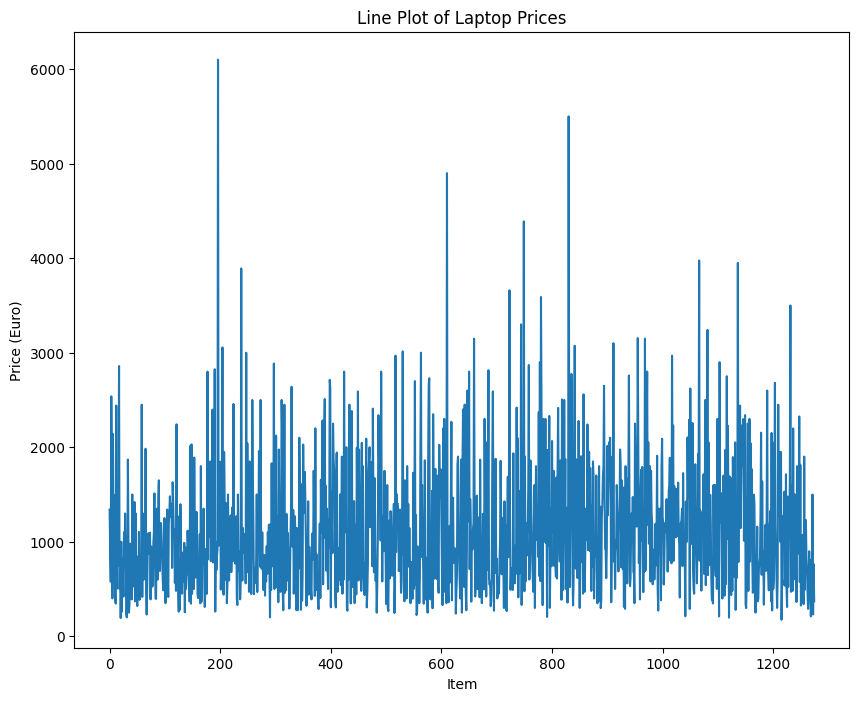

In [95]:
# Univariate data analysis
# Line plot of laptop prices
plt.figure(figsize=(10, 8))
sns.lineplot(data=laptop_df,x = laptop_df.index, y="Price (Euro)")
plt.title("Line Plot of Laptop Prices")
plt.xlabel("Item")
plt.ylabel("Price (Euro)")
plt.show()

##### This lineplot shows that the maximum price for a laptop in this dataset is about 6000 Euros. In addition, most of the laptops cost between 1000 to 1200 Euros

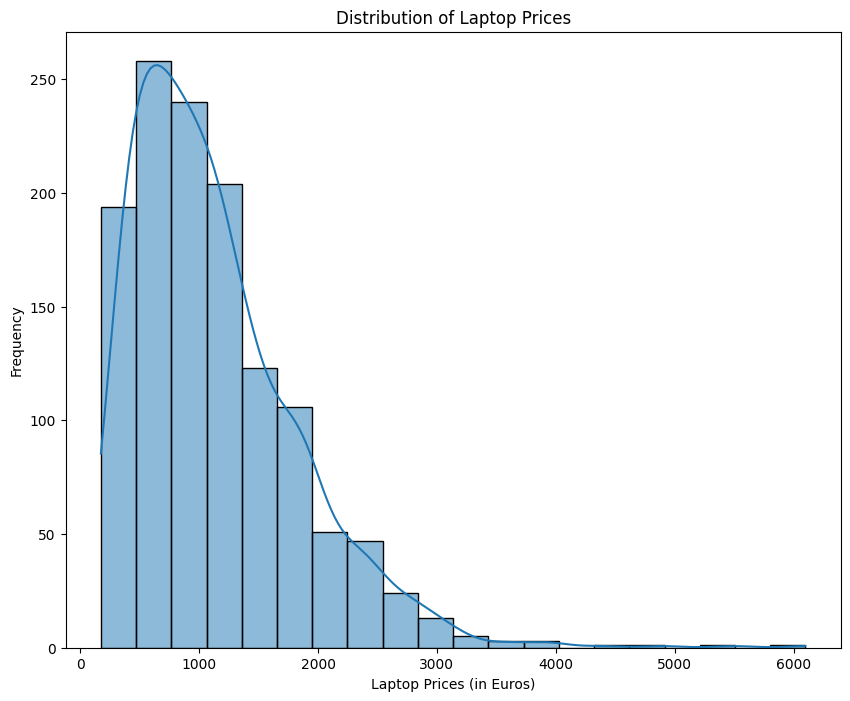

In [96]:
# Histogram showing distribution of laptop prices
plt.figure(figsize=(10, 8))
sns.histplot(laptop_df["Price (Euro)"], bins=20, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Laptop Prices (in Euros)")
plt.ylabel("Frequency")
plt.show()

##### This histogram shows a right-skewed distribution of the laptop prices, indicating that a majority of the laptops have lower prices between 1000 and 1200 Euros. The more expensive laptops are less common. This makes sense because most consumers will go for the cheapest option that meets their requirements

#### B: Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [97]:
# Group Laptop manufacturing companies by their average prices
avg_company_price = laptop_df.groupby("Company").agg({"Price (Euro)": "mean"}).reset_index()
avg_company_price

,Company,Price (Euro)
0,Acer,633.464455
1,Apple,1564.198571
2,Asus,1123.829737
3,Chuwi,314.296667
4,Dell,1199.225120
5,Fujitsu,729.000000
6,Google,1677.666667
7,HP,1080.314664
8,Huawei,1424.000000
9,LG,2099.000000


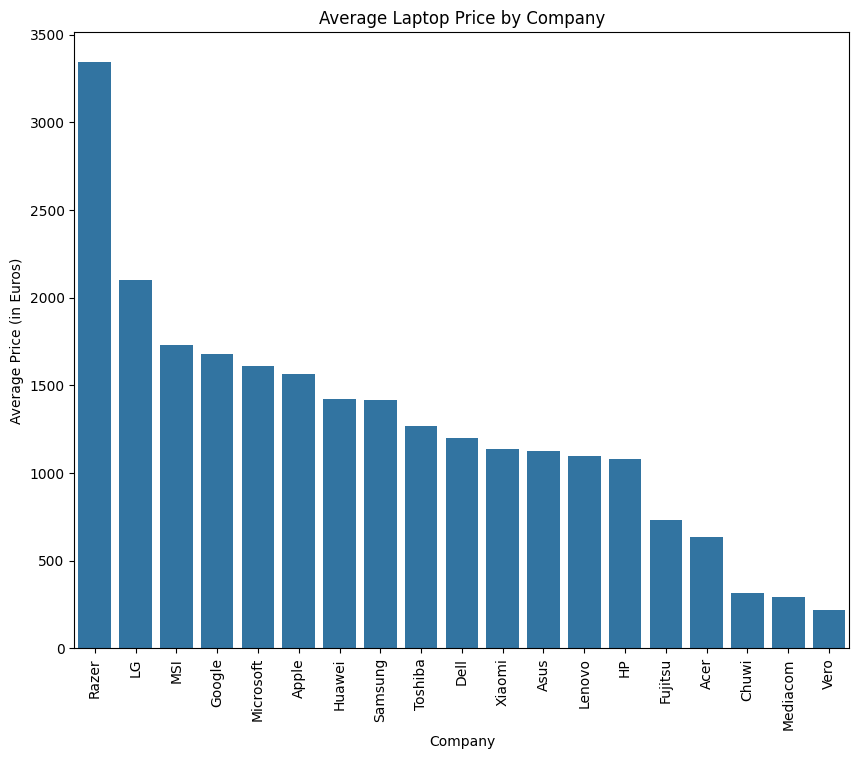

In [98]:
# Plot the average company prices in descending order
plt.figure(figsize=(10, 8))
sns.barplot(
    x=avg_company_price["Company"],
    y=avg_company_price["Price (Euro)"],
order=avg_company_price.sort_values(by=['Price (Euro)'], ascending=False)["Company"])
plt.title("Average Laptop Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price (in Euros)")
plt.xticks(rotation=90)
plt.show()

##### From this barplot it is obvious that Razer makes the laptops with the highest prices on average, followed by LG and MSI. This is no surprise because Razer makes gaming laptops, which tend to be more expensive that conventional devices because of their specialized hardware.  

##### The average laptop price for each company is as presented in the data frame above, with the general average being 1134.969059 Euros (obtained from the computation of the data frame info() above)

#### C: Find the different types of Operating systems present in the data - under the column name "OpSys". Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

In [99]:
# Obtain unique operating system types
laptop_df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [100]:
# Replace redundant class names
laptop_df["OpSys"] = laptop_df["OpSys"].replace(["macOS", "Mac OS X"], "Mac OS")
laptop_df["OpSys"] = laptop_df["OpSys"].replace("Windows 10 S", "Windows 10")
laptop_df["OpSys"].unique()

array(['Mac OS', 'No OS', 'Windows 10', 'Linux', 'Android', 'Chrome OS',
       'Windows 7'], dtype=object)

##### There are 6 different types of operating systems present for laptops in this data set: Mac OS, Windows 10, Linux, Android, Chrome OS, and Windows 7. The last class comprises of devices that do not have an OS.

#### D: Plot the distribution prices for each of the operating system types, so that the number of plots equals the number of unique operating systems.

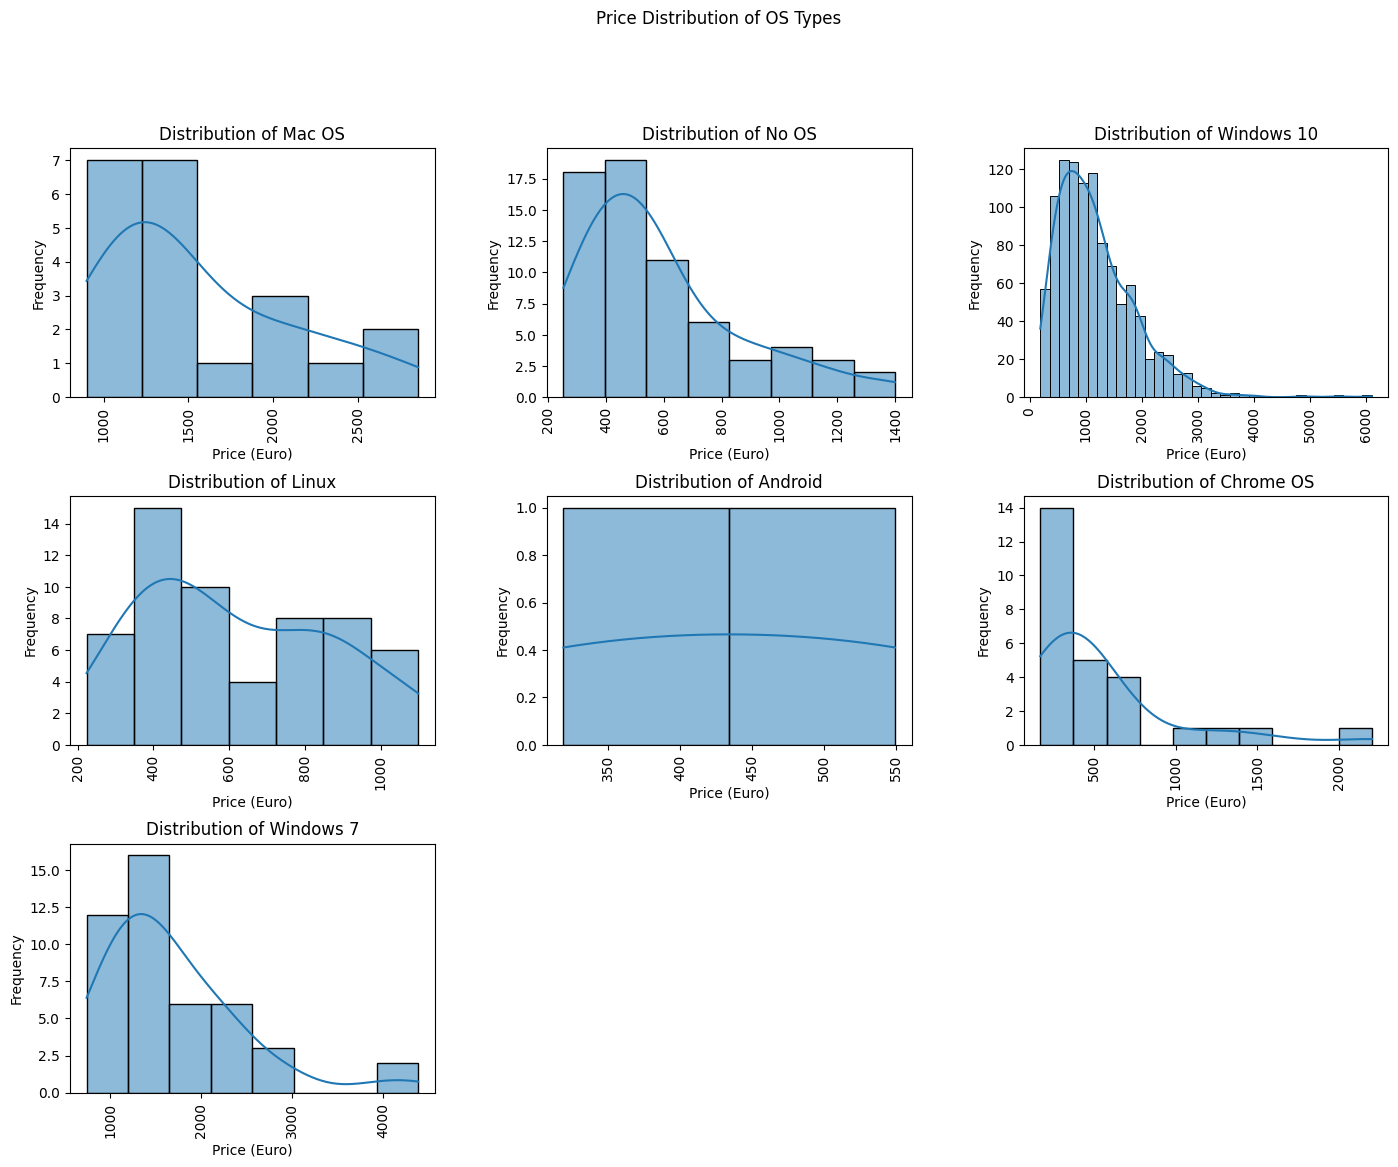

In [101]:
# Get the number of unique OS
unique_os = laptop_df["OpSys"].unique()
# Adjust the number of axes rows and columns to accommodate all unique OS types
num_rows = 3
num_cols = math.ceil(len(unique_os) / num_rows)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle("Price Distribution of OS Types")
fig.tight_layout(pad=5.0)
num_plots = len(unique_os)

# Loop through the classes to generate the distribution plots
for i in range(num_plots):
    row = i // num_cols  # Calculate the row index
    col = i % num_cols  # Calculate the column index
    # Use row and col indices to access the Axes object.
    sns.histplot(data=laptop_df[laptop_df["OpSys"] == unique_os[i]], x="Price (Euro)", ax=axs[row, col], kde=True)
    axs[row, col].set_title(f"Distribution of {unique_os[i]}")
    axs[row, col].set_xlabel("Price (Euro)")
    axs[row, col].set_ylabel("Frequency")
    axs[row, col].tick_params(axis="x", rotation=90)

# remove excess axes, if any.
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols  # Calculate the row index
    col = i % num_cols  # Calculate the column index
    fig.delaxes(axs[row, col])

plt.show()

##### The frequency distribution plots reveal that Windows 10 is the most common OS, with prices mostly between 800 and 1500 Euros, intersecting with the general average.  
##### In addition, Android is the least common OS, while Linux products seem to have the cheapest prices.  
##### Overall, most of the distributions are right skewed (with the exception of Android devices), as most customers tend to prefer the cheaper options.

#### E: What is the relationship between RAM and computer price? add an adequate plot to support your findings.

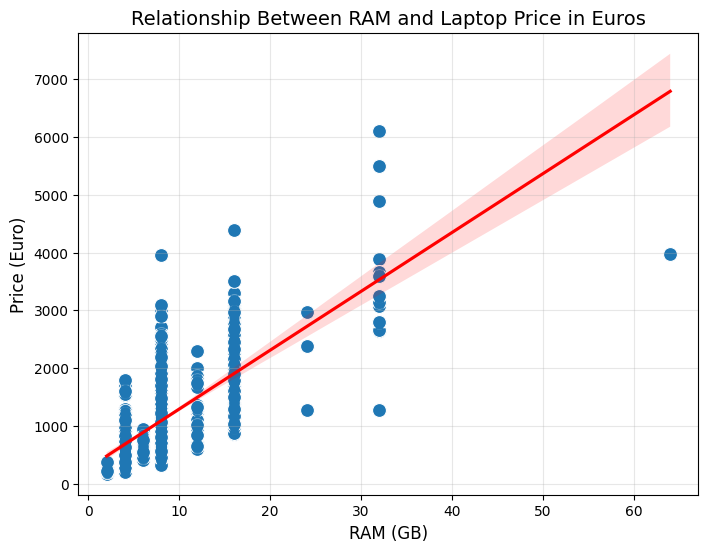

In [102]:
# Scatter plot of RAM values in Gigabytes vs prices
plt.figure(figsize=(8, 6))
sns.scatterplot(data=laptop_df, x="RAM (GB)", y="Price (Euro)", s=100)
sns.regplot(data=laptop_df, x="RAM (GB)", y="Price (Euro)", scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title("Relationship Between RAM and Laptop Price in Euros", fontsize=14)
plt.xlabel("RAM (GB)", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

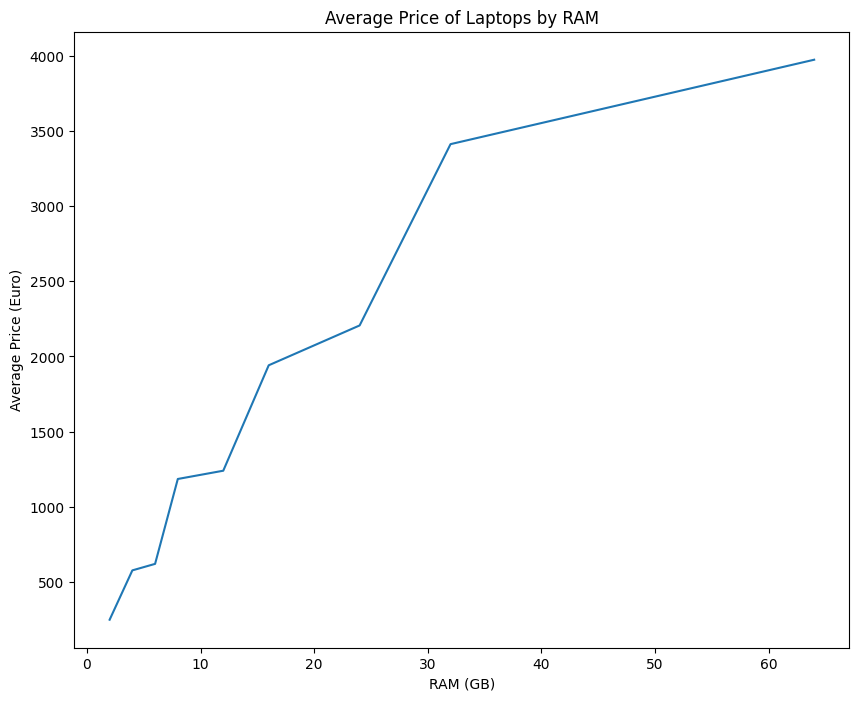

In [103]:
# Visualizing the Average Price of Laptops by RAM
avg_price_ram = laptop_df.groupby("RAM (GB)").agg({"Price (Euro)": "mean"}).reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(data=avg_price_ram, x="RAM (GB)", y= "Price (Euro)")
plt.title("Average Price of Laptops by RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (Euro)")
plt.show()

##### These plots reveal that on average, the cost of laptops tend to increase with an increase in the RAM size. More memory equals a higher cost

#### F: Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory". For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

In [104]:
# Create a new column for storage type values
laptop_df["Storage type"] = laptop_df["Memory"].str.split(" ", n=1, expand=True)[1]
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,Mac OS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,Mac OS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,Mac OS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,Mac OS,1.37,1803.60,SSD


In [114]:
# Verify that the Storage type column was properly created
laptop_df["Storage type"].head()

,Storage type
0,SSD
1,Flash Storage
2,SSD
3,SSD
4,SSD


#### There are 12 different storage type classes in the dataset presented in the array below:

In [115]:
# Print the number of unique storage types and the possible values
print(laptop_df["Storage type"].nunique())
laptop_df["Storage type"].unique()

12


array(['SSD', 'Flash Storage', 'HDD', 'SSD +  1TB HDD',
       'SSD +  256GB SSD', 'SSD +  2TB HDD', 'Hybrid', 'SSD +  500GB HDD',
       'SSD +  512GB SSD', 'Flash Storage +  1TB HDD', 'HDD +  1TB HDD',
       'SSD +  1.0TB Hybrid'], dtype=object)

#### Q3:
#### Think of additional questions related to this data. What types of analyses and visualizations would you use to address them? Select two questions from your list and implement. Submit your list of questions, suggested analyses and visualizations and the implementation.

#### Questions  
1) What laptop types are the most commonly purchased?  
$\qquad$ Potential solution: Get a value count of the type names and plot the results in a bar chart in descending order.  
2) What company has the largest number of products?  
$\qquad$ Potential solution: Group the count of products by their manufacturing companies and order the group in descending order.  
3) What is the most popular CPU company?   
$\qquad$ Potential solution: Plot the count of CPU companies in a bar plot and display in descending order.  
4) What is the relationship between size in inches and weight?  
$\qquad$ Potential solution: Make a scatter plot of size and weight. To remove noise, take the average weight for each size type.

5) What is the most popular CPU type?  
$\qquad$ Potential solution: Make a barplot of the CPU types by their count and arrange the plot in descending order.  
6) What is the relationship between weight and price  
$\qquad$ Potential solution: Make a scatter plot with weight on the x-axis and price on the y-axis. Take the average price for each weight (or weight category) to eliminate noise.  
7) Do companies favour particular CPU or GPU manufacturers?  
$\qquad$ Potential solution: Group the companies by CPU and GPU manufacturers and plot the results in bars.  
8) What is the most popular GPU company?  
$\qquad$ Potential solution: Make a bar plot of the count of GPU companies and arrange them in descending order.  
9) Do particular companies favour certain storage types?  
$\qquad$ Potential solution: Group the companies by storage types and make a bar plot of the results.   
10) What kind of laptops are the best sellers for each company?  
$\qquad$ Potential solution: Group the companies by type names and order the group in descending order.

#### Investigating the highest selling products for each company

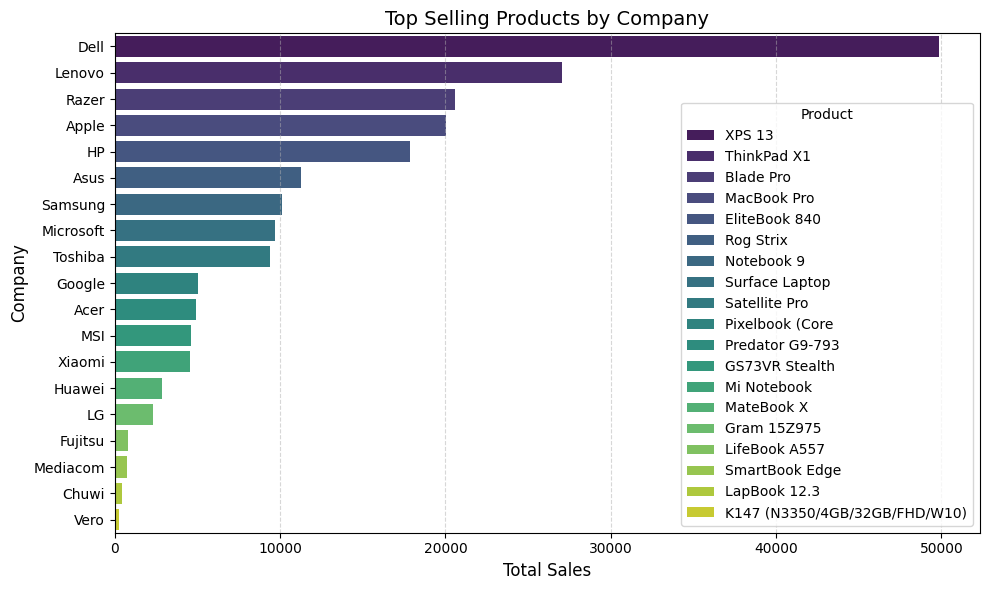

In [130]:
# Group by Company and Product to calculate total sales
company_product = laptop_df.groupby(["Company", "Product"], as_index=False).sum()

# Find the product with the highest sales for each company
highest_sales = company_product.loc[company_product.groupby("Company")["Price (Euro)"].idxmax()]

# Sort the results in descending order of sales
highest_sales_sorted = highest_sales.sort_values(by="Price (Euro)", ascending=False)

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=highest_sales_sorted,
    x="Price (Euro)",
    y="Company",
    hue="Product",
    palette='viridis'
)
plt.title('Top Selling Products by Company', fontsize=14)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.legend(title="Product", loc="lower right")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### The highest selling product for each company is shown in the bar chart below, with the overall highest sales coming from the XPS 13, a Dell product

In [108]:
# Check the unique laptop types available
laptop_df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

##### The bestsellers for each company are presented above, with the highest sales coming from the Thinkpad P51, a Lenovo product

In [110]:
# Count the values and create a dataset for visualization
popular_type = pd.DataFrame(laptop_df["TypeName"].value_counts())
popular_type

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


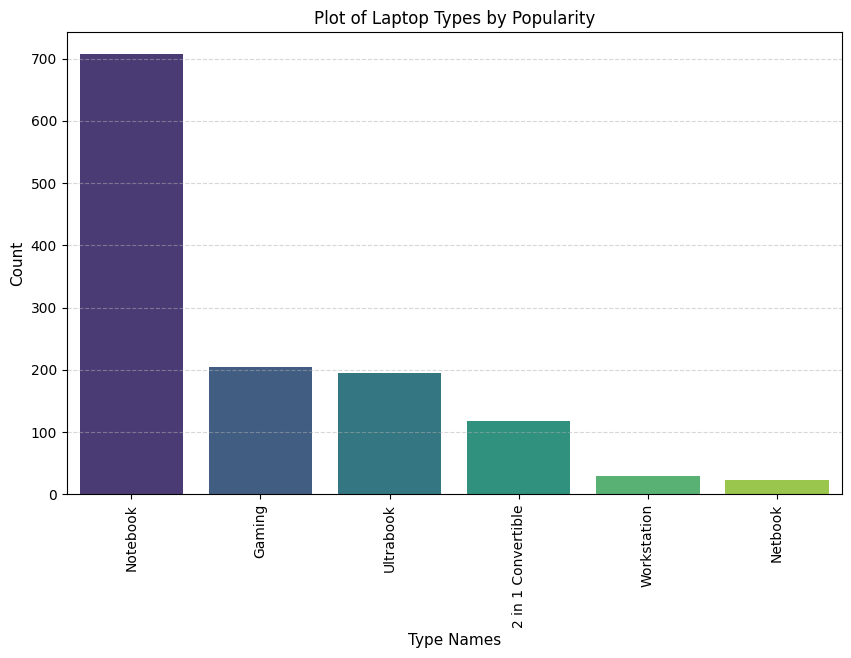

In [117]:
# Group by company and find the product with the highest price
popular_type = pd.DataFrame(laptop_df["TypeName"].value_counts())
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_type, x="TypeName", y= "count", hue="TypeName", palette='viridis')
plt.title("Plot of Laptop Types by Popularity", fontsize=12)
plt.xlabel("Type Names", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=90)
plt.show()

##### Notebooks are the most common laptop type. This is no surprise because they are not expensive and offer sufficient functionality for most everyday tasks